# **Load Dependencies**

In [ ]:
!pip install pycaret

     |████████████████████████████████| 288 kB 7.9 MB/s 
     |████████████████████████████████| 167 kB 52.7 MB/s 
     |████████████████████████████████| 1.3 MB 32.4 MB/s 
     |████████████████████████████████| 2.0 MB 43.3 MB/s 
     |████████████████████████████████| 1.7 MB 53.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.5 MB 625 kB/s 
     |████████████████████████████████| 113 kB 40.9 MB/s 
     |████████████████████████████████| 261 kB 22.1 MB/s 
     |████████████████████████████████| 6.8 MB 39.7 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 86 kB 4.1 MB/s 
     |████████████████████████████████| 675 kB 15.6 MB/s 
     |████████████████████████████████| 62 kB 693 kB/s 
     |████████████████████████████████| 596 kB 44.6 MB/s 
     |████████████████████

In [ ]:
import pandas as pd
from pycaret.clustering import *
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

import statsmodels as sm
from scipy import stats
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
import seaborn as sns

# **Load Data**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/In-class Assignment - Customer Segmentation/Code Templates/Supermarket Data.csv')
print(df.shape)
df.head()

(956574, 22)


,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200732,20071005,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,LS,E02
1,200733,20071010,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,LS,E02
2,200741,20071209,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,YF,994108700468327,L,MM,Full Shop,Grocery,STORE00001,LS,E02
3,200731,20070929,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237811,L,LA,Full Shop,Mixed,STORE00001,LS,E02
4,200737,20071110,7,14,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,NaN,NaN,NaN,994108300002212,L,MM,Full Shop,Fresh,STORE00001,LS,E02


### Convert to datetime format

In [ ]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df.tail()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
956569,200617,2006-06-22,5,12,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994101100088778,M,MM,Top Up,Fresh,STORE00002,LS,W01
956570,200633,2006-10-13,6,20,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994102700099738,L,LA,Top Up,Fresh,STORE00002,LS,W01
956571,200617,2006-06-22,5,18,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000544241,LA,YA,994101100506174,L,LA,Top Up,Fresh,STORE00002,LS,W01
956572,200619,2006-07-06,5,19,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000423155,LA,YF,994101300433650,L,LA,Full Shop,Fresh,STORE00002,LS,W01
956573,200635,2006-10-23,2,21,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994102900104676,L,MM,Top Up,Fresh,STORE00002,LS,W01


# **Prepare customer single view**

# Define features

Total visits = COUNT(DISTINCT BASKET ID)

Ticket size = SUM(SPEND)/COUNT(DISTINCT BASKET ID)

Total no. of SKUs


# Calculate features

In [ ]:
# One-hot Encoding for Category features
encode_cols = ["BASKET_DOMINANT_MISSION","BASKET_TYPE","STORE_REGION","BASKET_SIZE","CUST_LIFESTAGE"]
cols = ["CUST_CODE"]
df = pd.get_dummies(df, prefix=None, prefix_sep='_',columns = encode_cols)
print(df.shape)
df.head()

(956574, 37)


,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,BASKET_ID,BASKET_PRICE_SENSITIVITY,STORE_CODE,STORE_FORMAT,BASKET_DOMINANT_MISSION_Fresh,BASKET_DOMINANT_MISSION_Grocery,BASKET_DOMINANT_MISSION_Mixed,BASKET_DOMINANT_MISSION_Nonfood,BASKET_DOMINANT_MISSION_XX,BASKET_TYPE_Full Shop,BASKET_TYPE_Small Shop,BASKET_TYPE_Top Up,BASKET_TYPE_XX,STORE_REGION_E02,STORE_REGION_W01,BASKET_SIZE_L,BASKET_SIZE_M,BASKET_SIZE_S,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_PE,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF
0,200732,2007-10-05,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,994107800547472,MM,STORE00001,LS,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
1,200733,2007-10-10,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,994107900512001,MM,STORE00001,LS,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
2,200741,2007-12-09,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,994108700468327,MM,STORE00001,LS,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3,200731,2007-09-29,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,994107700237811,LA,STORE00001,LS,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
4,200737,2007-11-10,7,14,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,NaN,NaN,994108300002212,MM,STORE00001,LS,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
##prepare customer single view
df_csv = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max'),
                                                                                  TotalQuantity = ('QUANTITY', 'sum'),
                                                                                  AvgSpend = ('SPEND', 'mean'),
                                                                                  AvgQuantity = ('QUANTITY', 'mean'),
                                                                                  AvgShopWeek = ('SHOP_WEEKDAY', 'mean'),
                                                                                  AvgShopHour = ('SHOP_HOUR', 'mean'),
                                                                     TotalFresh = ('BASKET_DOMINANT_MISSION_Fresh', 'sum'),
                                                                     TotalGrocery = ('BASKET_DOMINANT_MISSION_Grocery', 'sum'),
                                                                     TotalMixed = ('BASKET_DOMINANT_MISSION_Mixed', 'sum'),
                                                                     TotalNonfood = ('BASKET_DOMINANT_MISSION_Nonfood', 'sum'),
                                                                     TotalXX = ('BASKET_DOMINANT_MISSION_XX', 'sum'),
                                                                     TotalSize_L = ('BASKET_SIZE_L', 'sum'),
                                                                     TotalSize_M = ('BASKET_SIZE_M', 'sum'),
                                                                     TotalSize_S = ('BASKET_SIZE_S', 'sum'),
                                                                     CUST_LIFESTAGE_OA = ('CUST_LIFESTAGE_OA', 'max'),
                                                                     CUST_LIFESTAGE_OF = ('CUST_LIFESTAGE_OF', 'max'),
                                                                     CUST_LIFESTAGE_OT = ('CUST_LIFESTAGE_OT', 'max'),
                                                                     CUST_LIFESTAGE_PE = ('CUST_LIFESTAGE_PE', 'max'),
                                                                     CUST_LIFESTAGE_YA = ('CUST_LIFESTAGE_YA', 'max'),
                                                                     CUST_LIFESTAGE_YF = ('CUST_LIFESTAGE_YF', 'max')).reset_index()
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

##find max date in the dataset
max_date = df_csv['LastDate'].max()

##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

##calculate weekday of lastest date
df_csv["WEEKDAY"] = df_csv["LastDate"].dt.dayofweek


print(df_csv.shape)
df_csv.head()

(6100, 29)


,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,TotalQuantity,AvgSpend,AvgQuantity,AvgShopWeek,AvgShopHour,TotalFresh,TotalGrocery,TotalMixed,TotalNonfood,TotalXX,TotalSize_L,TotalSize_M,TotalSize_S,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_PE,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF,TicketSize,total_days,recency,WEEKDAY
0,CUST0000000181,2.44,1,1,2007-01-06,2007-01-06,1,2.440000,1.000000,7.000000,13.000000,1.0,0.0,0.0,0,0,0.0,0.0,1.0,0,0,0,0,0,0,2.440000,1,547,5
1,CUST0000000369,959.33,220,189,2006-04-16,2008-07-05,923,1.372432,1.320458,4.090129,15.420601,479.0,87.0,127.0,6,0,83.0,499.0,117.0,1,0,0,0,0,0,4.360591,812,1,5
2,CUST0000000689,328.57,16,116,2007-07-22,2008-06-23,334,1.776054,1.805405,3.416216,15.367568,34.0,16.0,132.0,3,0,164.0,17.0,4.0,0,0,0,0,0,0,20.535625,338,13,0
3,CUST0000000998,5.95,3,4,2006-05-04,2006-07-07,6,1.487500,1.500000,3.250000,11.500000,0.0,2.0,0.0,2,0,0.0,1.0,3.0,0,0,0,0,0,0,1.983333,65,730,4
4,CUST0000001163,39.74,4,24,2006-10-22,2008-06-22,34,1.589600,1.360000,4.000000,15.400000,13.0,0.0,12.0,0,0,23.0,0.0,2.0,0,0,0,0,0,0,9.935000,610,14,6


In [ ]:
cols = list(df_csv.columns)
ignore_cols = ["CUST_CODE", "FirstDate", "LastDate"]
features = [i for i in cols if i not in ignore_cols]
print(len(features), "features")
features

26 features


['TotalSpend',
 'TotalVisits',
 'TotalSKUs',
 'TotalQuantity',
 'AvgSpend',
 'AvgQuantity',
 'AvgShopWeek',
 'AvgShopHour',
 'TotalFresh',
 'TotalGrocery',
 'TotalMixed',
 'TotalNonfood',
 'TotalXX',
 'TotalSize_L',
 'TotalSize_M',
 'TotalSize_S',
 'CUST_LIFESTAGE_OA',
 'CUST_LIFESTAGE_OF',
 'CUST_LIFESTAGE_OT',
 'CUST_LIFESTAGE_PE',
 'CUST_LIFESTAGE_YA',
 'CUST_LIFESTAGE_YF',
 'TicketSize',
 'total_days',
 'recency',
 'WEEKDAY']

# Data Exploration

In [ ]:
df_csv[features].describe() 

,TotalSpend,TotalVisits,TotalSKUs,TotalQuantity,AvgSpend,AvgQuantity,AvgShopWeek,AvgShopHour,TotalFresh,TotalGrocery,TotalMixed,TotalNonfood,TotalXX,TotalSize_L,TotalSize_M,TotalSize_S,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_PE,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF,TicketSize,total_days,recency,WEEKDAY
count,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000
mean,246.038310,20.029180,49.596230,198.286230,1.902750,1.417752,3.977717,14.823221,64.668197,13.241967,51.647869,1.821148,0.242459,93.544918,30.229836,7.846885,0.116066,0.057705,0.324754,0.054262,0.146557,0.168197,10.106979,331.616230,243.070000,3.160820
std,704.599006,51.230247,98.500511,593.785811,2.176988,0.593464,1.432227,3.027735,196.169545,47.730258,164.913510,5.914429,1.446902,292.569580,97.172551,22.480346,0.320330,0.233204,0.468321,0.226553,0.353693,0.374072,13.215505,321.741491,247.437688,2.024171
min,0.010000,1.000000,1.000000,1.000000,0.010000,1.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.627500,1.000000,2.000000,3.000000,1.088893,1.000000,3.015162,12.983736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.999318,1.000000,27.000000,1.000000
50%,19.145000,3.000000,9.000000,15.000000,1.587656,1.280976,4.000000,15.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.710833,263.500000,139.000000,3.000000
75%,112.637500,11.000000,43.000000,90.000000,2.142031,1.584032,4.894351,17.000000,28.000000,7.000000,21.000000,1.000000,0.000000,33.000000,15.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,13.296193,671.000000,422.000000,5.000000
max,14998.110000,666.000000,893.000000,17659.000000,60.960000,12.833333,7.000000,21.000000,2557.000000,1529.000000,2098.000000,109.000000,38.000000,3203.000000,2271.000000,332.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,306.970000,819.000000,818.000000,6.000000


Number of features: 26


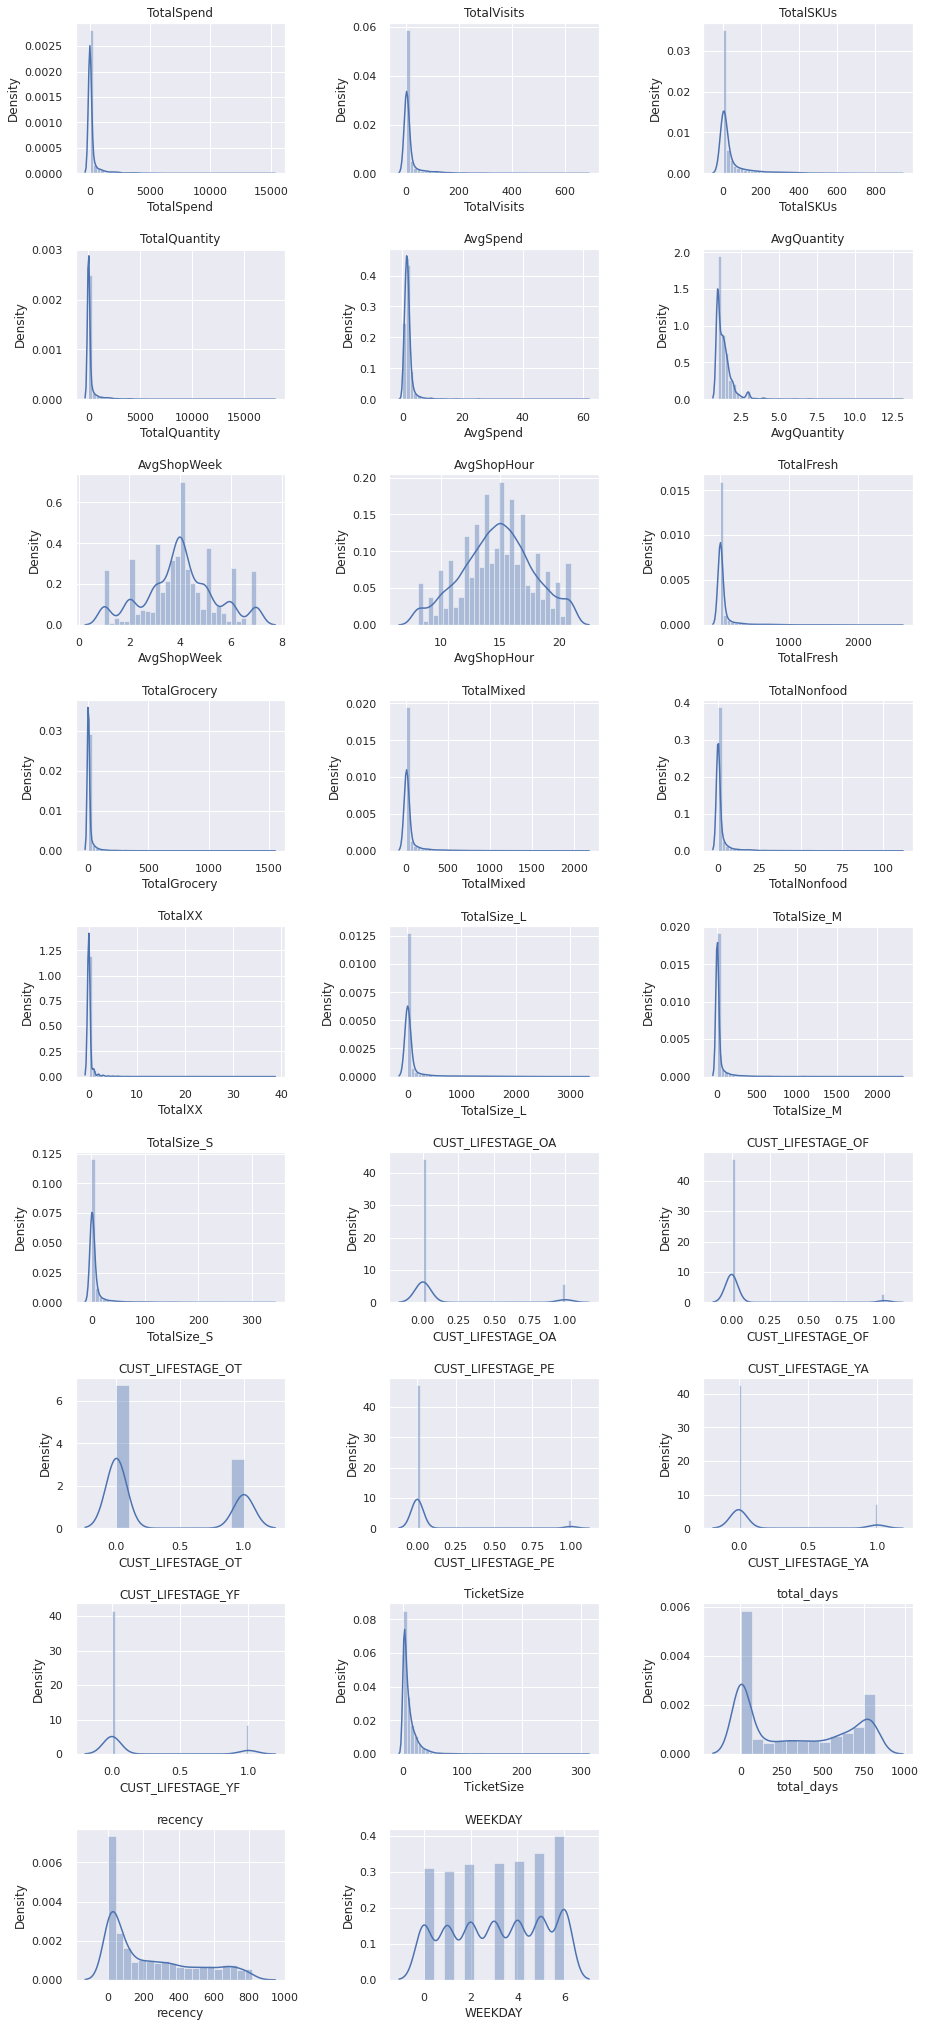

In [ ]:
numfeat = len(features)
print("Number of features:", numfeat)
  
column = 3
row = int(np.ceil(numfeat/column))
fig = plt.figure()
fig.set_size_inches(column * 5, row * 4, forward=True)
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout() 

for i, feat in enumerate(features):
  ax = fig.add_subplot(row,column,i+1)
  sns.distplot(df_csv[feat], ax=ax)
  plt.title(feat)

In [ ]:
# No missing value
df_csv.isnull().sum()

CUST_CODE            0
TotalSpend           0
TotalVisits          0
TotalSKUs            0
FirstDate            0
LastDate             0
TotalQuantity        0
AvgSpend             0
AvgQuantity          0
AvgShopWeek          0
AvgShopHour          0
TotalFresh           0
TotalGrocery         0
TotalMixed           0
TotalNonfood         0
TotalXX              0
TotalSize_L          0
TotalSize_M          0
TotalSize_S          0
CUST_LIFESTAGE_OA    0
CUST_LIFESTAGE_OF    0
CUST_LIFESTAGE_OT    0
CUST_LIFESTAGE_PE    0
CUST_LIFESTAGE_YA    0
CUST_LIFESTAGE_YF    0
TicketSize           0
total_days           0
recency              0
WEEKDAY              0
dtype: int64

In [ ]:
df = df_csv[features].copy()
exp_clu = setup(data=df, normalize=True)

,Description,Value
0,session_id,1025
1,Original Data,"(6100, 26)"
2,Missing Values,False
3,Numeric Features,25
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(6100, 32)"
9,CPU Jobs,-1


# Model Development

*   K-means clustering




In [ ]:
metrics = []
create_model('kmeans')
metric_result = pull()
metric_result['model'] = 'kmeans'
metrics.append(metric_result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5187,3572.8545,1.0566,0,0,0


In [ ]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
model,,,,,,
kmeans,0.518700,3572.854500,1.056600,0,0,0


In [ ]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5187,3572.8545,1.0566,0,0,0


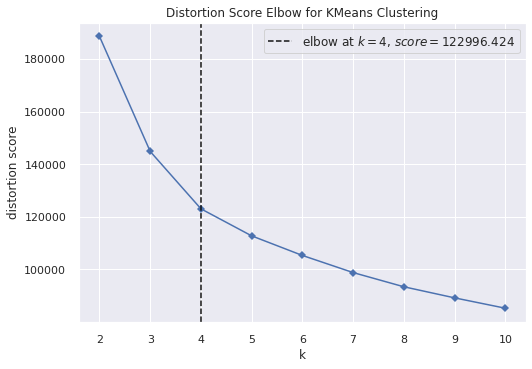

In [ ]:
plot_model(kmeans, plot = 'elbow')

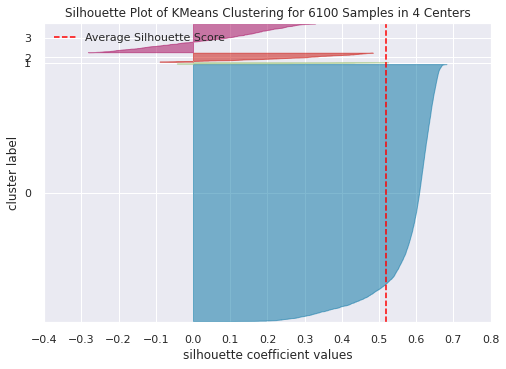

In [ ]:
plot_model(kmeans, plot = 'silhouette')

In [ ]:
kmeans = create_model('kmeans', num_clusters = 4)
plot_model(kmeans)

In [ ]:
df['cluster'] = kmeans.fit_predict(df)
df.head()

,TotalSpend,TotalVisits,TotalSKUs,TotalQuantity,AvgSpend,AvgQuantity,AvgShopWeek,AvgShopHour,TotalFresh,TotalGrocery,TotalMixed,TotalNonfood,TotalXX,TotalSize_L,TotalSize_M,TotalSize_S,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_PE,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF,TicketSize,total_days,recency,WEEKDAY,cluster
0,2.44,1,1,1,2.440000,1.000000,7.000000,13.000000,1.0,0.0,0.0,0,0,0.0,0.0,1.0,0,0,0,0,0,0,2.440000,1,547,5,1
1,959.33,220,189,923,1.372432,1.320458,4.090129,15.420601,479.0,87.0,127.0,6,0,83.0,499.0,117.0,1,0,0,0,0,0,4.360591,812,1,5,2
2,328.57,16,116,334,1.776054,1.805405,3.416216,15.367568,34.0,16.0,132.0,3,0,164.0,17.0,4.0,0,0,0,0,0,0,20.535625,338,13,0,3
3,5.95,3,4,6,1.487500,1.500000,3.250000,11.500000,0.0,2.0,0.0,2,0,0.0,1.0,3.0,0,0,0,0,0,0,1.983333,65,730,4,1
4,39.74,4,24,34,1.589600,1.360000,4.000000,15.400000,13.0,0.0,12.0,0,0,23.0,0.0,2.0,0,0,0,0,0,0,9.935000,610,14,6,3


In [ ]:
df["cluster"].value_counts()

1    3202
3    2420
2     367
0     111
Name: cluster, dtype: int64

#Interpret and Conclusion

In [ ]:
summary = df.groupby('cluster').describe()
print(summary.shape)
orange = sns.light_palette('orange', as_cmap = True)
summary.style.background_gradient(cmap = orange)

(4, 208)


In [ ]:
df.groupby('cluster').mean().style.background_gradient(cmap = orange)

,TotalSpend,TotalVisits,TotalSKUs,TotalQuantity,AvgSpend,AvgQuantity,AvgShopWeek,AvgShopHour,TotalFresh,TotalGrocery,TotalMixed,TotalNonfood,TotalXX,TotalSize_L,TotalSize_M,TotalSize_S,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_PE,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF,TicketSize,total_days,recency,WEEKDAY
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4152.444144,233.702703,476.288288,3391.081081,1.984975,1.589271,3.992955,14.619900,1041.612613,169.189189,897.180180,15.522523,1.639640,1733.828829,328.603604,62.711712,0.171171,0.081081,0.225225,0.054054,0.090090,0.207207,22.061164,810.027027,3.990991,4.090090
1,15.955540,1.836352,7.460025,12.214866,1.892051,1.386999,3.968089,14.820132,3.702061,1.222361,3.205809,0.230481,0.030918,5.139913,2.174266,1.077452,0.103061,0.056839,0.344160,0.046846,0.148032,0.164897,8.438250,51.996565,418.688632,3.089944
2,1587.962616,121.722071,284.555858,1303.130790,1.877159,1.511847,4.001083,14.840075,445.286104,79.978202,341.253406,9.539510,1.449591,645.787466,192.893733,38.825613,0.152589,0.076294,0.239782,0.106267,0.122616,0.188011,18.017631,775.076294,8.678474,3.615804
3,167.785318,18.878099,50.144628,130.485537,1.917015,1.436305,3.986214,14.834077,42.802893,11.871901,33.041322,2.126860,0.275207,51.531818,28.997107,9.589256,0.125207,0.054959,0.316529,0.056198,0.150826,0.167769,10.566956,612.396694,57.214050,3.142975


# Conclusion
## Cluster 0 : 
###  ลักษณะ
   มีจำนวนการซื้อสินค้า และ การใช้จ่ายที่ค่อนข้างสูง และมีการซื้อสินค้าเป็นปริมาณมาก และเพิ่งเกิดให้ช่วงเวลานี้ ซึ่งเป็นลูกค้าที่เข้ามาซื้อเป็นประจำ
###  Action
   ควรมีการเพิ่มสิทธิพิเศษ หรือให้มีการสะสมแต้ม สำหรับลูกค้าที่มียอดซื้อสินค้าสูงๆ
## Cluster 1 : 
###  ลักษณะ
   เป็นกลุ่มลูกค้าที่มีปริมาณการซื้อสินค้าต่ำที่สุด และไม่ค่อยมีการ visit เข้ามา เนื่องจากเป็นลูกค้าใหม่ โดยดูจาก total day ที่ต่ำที่สุด เป็นกลุ่มคนที่ยังไม่รู้จัก
###  Action
   ควรทำการเพิ่ม Awareness ของลูกค้า โดยการยิง Ads เพิ่มขึ้น หรือเพิ่มโปรโมชัน เพื่อดึงดูดให้เข้ามาซื้อสินค้า
## Cluster 2 : 
###  ลักษณะ
   เป็นกลุ่มลูกค้าที่มีการซื้อสินค้าไม่นานมานี้ และมี ปริมาณการใช้จ่ายและจำนวนการซื้อสินค้า ค่อนข้างสูง แต่ยังน้อยกว่า cluster 0 อยู่
###  Action
   ทำการ up-selling มีการสร้างโปรโมชันเพื่อเพิ่มยอดขายให้มากขึ้น หรือแนะนำให้มีการสมัคร membership เพื่อเพิ่ม engagement
## Cluster 3 : 
###  ลักษณะ
   เป็นกลุ่มลูกค้าที่มี life stage เป็น เด็ก หรือ วัยรุ่น อยู่ และมีเงินในการซื้อสินค้าน้อย ทำให้มาซื้อไม่บ่อย และซื้อได้ไม่เยอะมาก
###  Action
   เพิ่มโปรโมชันส่วนลด สำหรับลูกค้ากลุ่มนี้ ทำการ cross-sell เพื่อกระตุ้นให้ดึงดูดให้ซื้อสินค้ามากขึ้น เนื่องจากได้รับส่วนลดให้ได้ราคาถูกกว่า


